<a href="https://colab.research.google.com/github/tevolve/EmotionDetect/blob/main/EmotionDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install opencv-python tensorflow requests Pillow
!pip install deepface
!pip install mtcnn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.0 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=216f3b202ca0d64cbe3d25c16beb1dbd67daa8ba9ccbae63c85a5073936df0e6
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire


Analisando a imagem com DeepFace...
Análise Facial Completa:
{'emotion': {'angry': 1.3647630660133803e-11, 'disgust': 4.580745513751612e-21, 'fear': 3.408269274847606e-19, 'happy': 100.0, 'sad': 4.033418932181121e-07, 'surprise': 5.300930086878965e-18, 'neutral': 3.8125438805991507e-06}, 'dominant_emotion': 'happy', 'region': {'x': 1704, 'y': 1153, 'w': 2714, 'h': 2714, 'left_eye': None, 'right_eye': None}, 'face_confidence': 0.87}
Emoções detectadas: {'angry': 1.3647630660133803e-11, 'disgust': 4.580745513751612e-21, 'fear': 3.408269274847606e-19, 'happy': 100.0, 'sad': 4.033418932181121e-07, 'surprise': 5.300930086878965e-18, 'neutral': 3.8125438805991507e-06}
Emoção dominante: happy


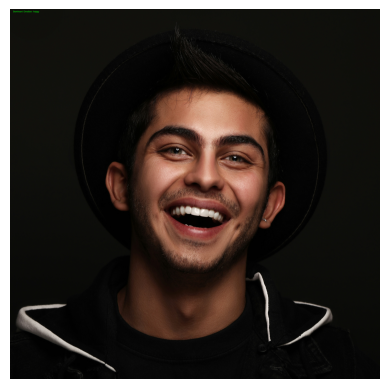

In [31]:
import cv2
import numpy as np
import requests
from PIL import Image
from io import BytesIO
from deepface import DeepFace
import matplotlib.pyplot as plt

# Função para baixar e carregar a imagem com User-Agent
def download_and_load_image(url, save_path):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }
    try:
        response = requests.get(url, headers=headers, stream=True)
        response.raise_for_status()  # Verifica se a solicitação foi bem-sucedida
        with open(save_path, 'wb') as file:
            for chunk in response.iter_content(1024):
                file.write(chunk)
        # Carregar a imagem salva
        img = Image.open(save_path)
        return img
    except Exception as e:
        print(f"Erro ao carregar a imagem: {e}")
        return None

# URL confiável da imagem de pessoa
image_url = 'https://images.unsplash.com/photo-1595152772835-219674b2a8a6'  # Imagem de um homem

# Caminho para salvar a imagem localmente
local_path = 'pessoa_baixada.jpg'

# Baixar e carregar a imagem
image = download_and_load_image(image_url, local_path)

# Verificar se a imagem foi carregada corretamente
if image is not None:
    # Pre-processamento da imagem
    image = image.resize((224, 224))  # Redimensionar para o tamanho de entrada do modelo
    image_np = np.array(image)  # Converter para array numpy

    # Normalizar a imagem
    image_np = image_np / 255.0  # Valores entre 0 e 1
    image_np = np.expand_dims(image_np, axis=0)  # Adicionar dimensão para o batch size

    # Exibir a imagem carregada para verificação
    image.show()  # Abre a imagem usando o visualizador padrão
else:
    print("Não foi possível carregar a imagem.")

# Função para análise facial
def analyze_face(image_path):
    try:
        # Realizando a análise de emoções com DeepFace
        print("Analisando a imagem com DeepFace...")
        analysis = DeepFace.analyze(image_path, actions=['emotion'])

        # Verificando a primeira (única) análise realizada, já que DeepFace retorna uma lista
        if analysis and isinstance(analysis, list):
            face_analysis = analysis[0]  # Acessando o primeiro item da lista de análises

            print("Análise Facial Completa:")
            print(face_analysis)

            # Exibir a emoção dominante detectada
            print("Emoções detectadas:", face_analysis['emotion'])
            print("Emoção dominante:", face_analysis['dominant_emotion'])

            # Carregar a imagem original com OpenCV para desenhar sobre ela
            img = cv2.imread(image_path)

            # Adicionar o texto da emoção dominante à imagem
            emotion_text = f"Dominant Emotion: {face_analysis['dominant_emotion']}"
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(img, emotion_text, (50, 50), font, 1, (0, 255, 0), 2, cv2.LINE_AA)

            # Mostrar a imagem com o texto sobreposto
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.axis('off')  # Ocultar os eixos
            plt.show()

        else:
            print("Erro: Não foi possível processar a análise facial.")

    except Exception as e:
        print(f"Erro na análise facial: {e}")

# Analisando a imagem com DeepFace
analyze_face(local_path)
